In [1]:
from horemheb.config import AnalysisConfig
from horemheb.loader import load_temperature_data
from horemheb.segments import process_segments
from horemheb.analysis import analyze_segments, analyze_segments_time_dependent
from horemheb.plotting import plot_linear_fit, plot_linear_fit_comparison, plot_all_segments

import numpy as np
import pandas as pd
from dataclasses import asdict
from typing import Dict, List

import matplotlib.pyplot as plt
#import matplotlib.dates as mdates

#from pathlib import Path

In [2]:
# Configure analysis parameters
config = AnalysisConfig(
    delay_time=80, #300, #240, #80, #240, #180, #120,
    before_sunrise_delta_minutes=0,
    resample_minutes=5
)

In [3]:
temperature_data_file_old_door = 'temperature_logB_12.csv'
temperature_data_file = 'temperature_logC_2025-03-12.csv'

# Filter New Door data after the specified timestamp
cutoff_time = '2025-02-27 19:48:04'

In [4]:
def get_temp_data(seg):
    """Simple function to plot the number of data points in each segment
    between delay_time and sunrise_time, or just after delay_time
    Args:
        seg: segment of cooling data
    """
    delay_time = pd.Timestamp(seg['delay_time'])
    sunrise = pd.Timestamp(seg['sunrise_time'])
    mask1 = (seg['temp1'].index >= delay_time) & (seg['temp1'].index <= sunrise)
    mask2 = (seg['temp2'].index >= delay_time)
    
    print(f"mask1 (delay_time <= time <= sunrise): {mask1.sum()}, mask2 (time >= delay_time): {mask2.sum()}")

---
### Old Door

In [5]:
# Old Door
dfo, dfo_r1, dfo_r2 = load_temperature_data(
    temperature_data_file,
    config,
    cutoff_time=cutoff_time,
    comparison='<='
)

In [6]:
# Old Door (using old door-only data file)
"""
dfo, dfo_r1, dfo_r2 = load_temperature_data(
    temperature_data_file_old_door,
    config,
)
"""

'\ndfo, dfo_r1, dfo_r2 = load_temperature_data(\n    temperature_data_file_old_door,\n    config,\n)\n'

In [7]:
# Find and process segments
segments = process_segments(dfo_r1, dfo_r2, config)

# Perform analysis
results = analyze_segments(segments, config)
print(f"A = {results.A:.3f} ± {results.A_err:.3f} °C/(°C/hour)")
print(f"b = {results.b:.3f} ± {results.b_err:.3f} °C")
print(f"A0 = {results.A0:.3f} ± {results.A0_err:.3f} °C/(°C/hour)")
print(f"R-squared = {results.r_squared:.3f}")
print(f"R-squared (through origin) = {results.r_squared0:.3f}")

A = 12.316 ± 0.120 °C/(°C/hour)
b = 4.948 ± 0.049 °C
A0 = 24.077 ± 0.051 °C/(°C/hour)
R-squared = 0.701
R-squared (through origin) = 0.980


In [8]:
# Perform time-dependent analysis A*(cooling rate)/(1 + b*t)
results_time_dependent = analyze_segments_time_dependent(segments, config)
print(f"A = {results_time_dependent.A:.3f} ± {results_time_dependent.A_err:.3f} [°C/(°C/hour)]")
print(f"b = {results_time_dependent.b:.3f} ± {results_time_dependent.b_err:.3f} [/hour]")
print(f"R-squared = {results_time_dependent.r_squared:.3f}")


A = 21.412 ± 0.065 [°C/(°C/hour)]
b = -0.039 ± 0.001 [/hour]
R-squared = 0.366


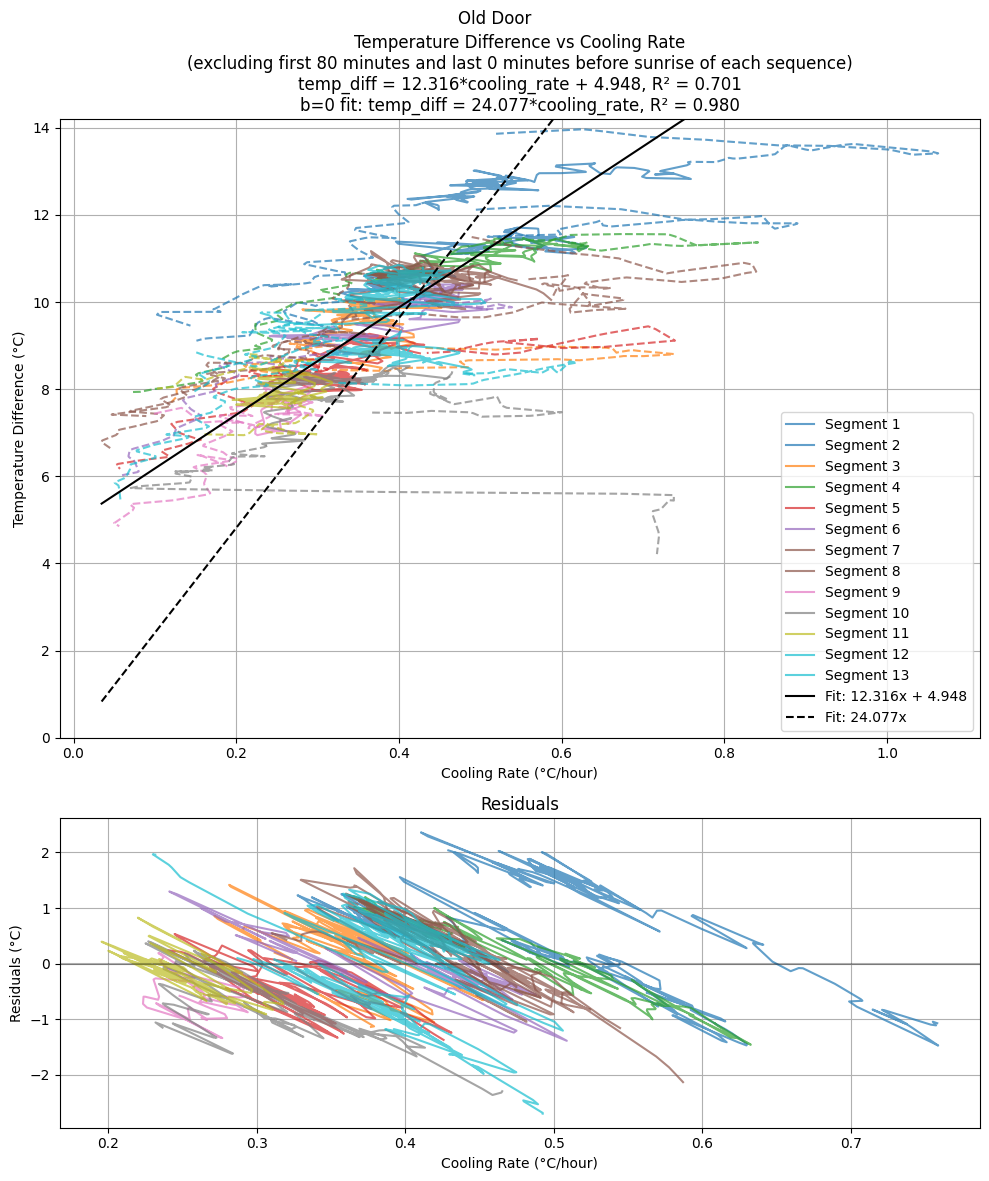

In [9]:
plot_linear_fit(segments, results, "Old Door", config=config)

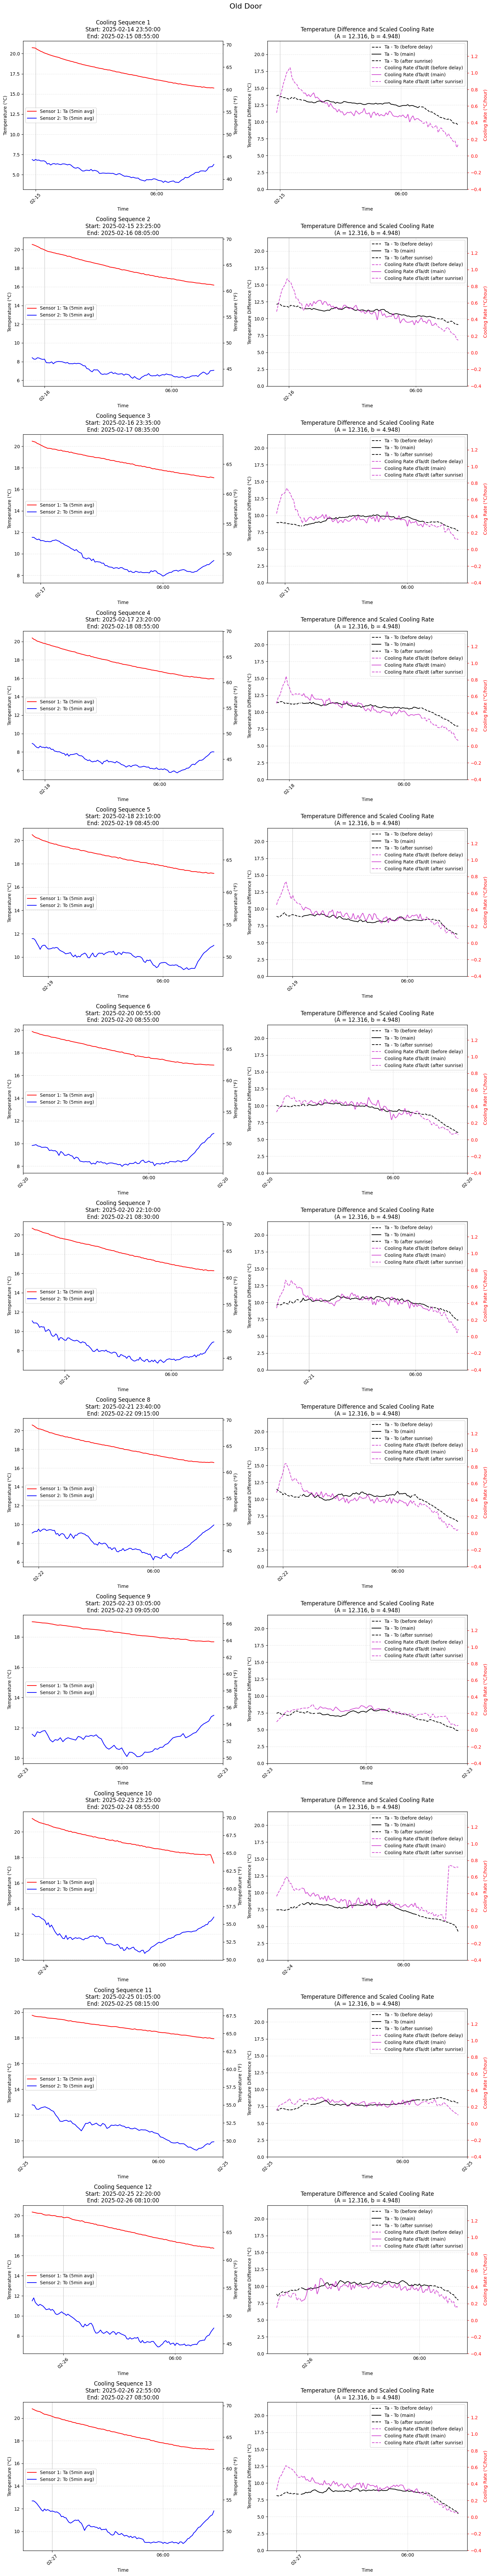

In [10]:
plot_all_segments(segments, results, "Old Door", config=config)

---
### New Door

In [11]:
# New Door
dfn, dfn_r1, dfn_r2 = load_temperature_data(
    temperature_data_file,
    config,
    cutoff_time=cutoff_time,
    comparison='>='
)

In [12]:
# Find and process segments
segments = process_segments(dfn_r1, dfn_r2, config)

# Perform analysis
results = analyze_segments(segments, config)
print(f"A = {results.A:.3f} ± {results.A_err:.3f} °C/(°C/hour)")
print(f"b = {results.b:.3f} ± {results.b_err:.3f} °C")
print(f"A0 = {results.A0:.3f} ± {results.A0_err:.3f} °C/(°C/hour)")
print(f"R-squared = {results.r_squared:.3f}")
print(f"R-squared (through origin) = {results.r_squared0:.3f}")

A = 14.766 ± 0.158 °C/(°C/hour)
b = 3.891 ± 0.061 °C
A0 = 24.484 ± 0.062 °C/(°C/hour)
R-squared = 0.689
R-squared (through origin) = 0.975


In [13]:
# Perform time-dependent analysis A*(cooling rate)/(1 + b*t)
results_time_dependent = analyze_segments_time_dependent(segments, config)
print(f"A = {results_time_dependent.A:.3f} ± {results_time_dependent.A_err:.3f} [°C/(°C/hour)]")
print(f"b = {results_time_dependent.b:.3f} ± {results_time_dependent.b_err:.3f} [/hour]")
print(f"R-squared = {results_time_dependent.r_squared:.3f}")


A = 21.701 ± 0.072 [°C/(°C/hour)]
b = -0.041 ± 0.001 [/hour]
R-squared = 0.601


In [14]:
21.7*0.4/(1. - 0.04*0)

8.68

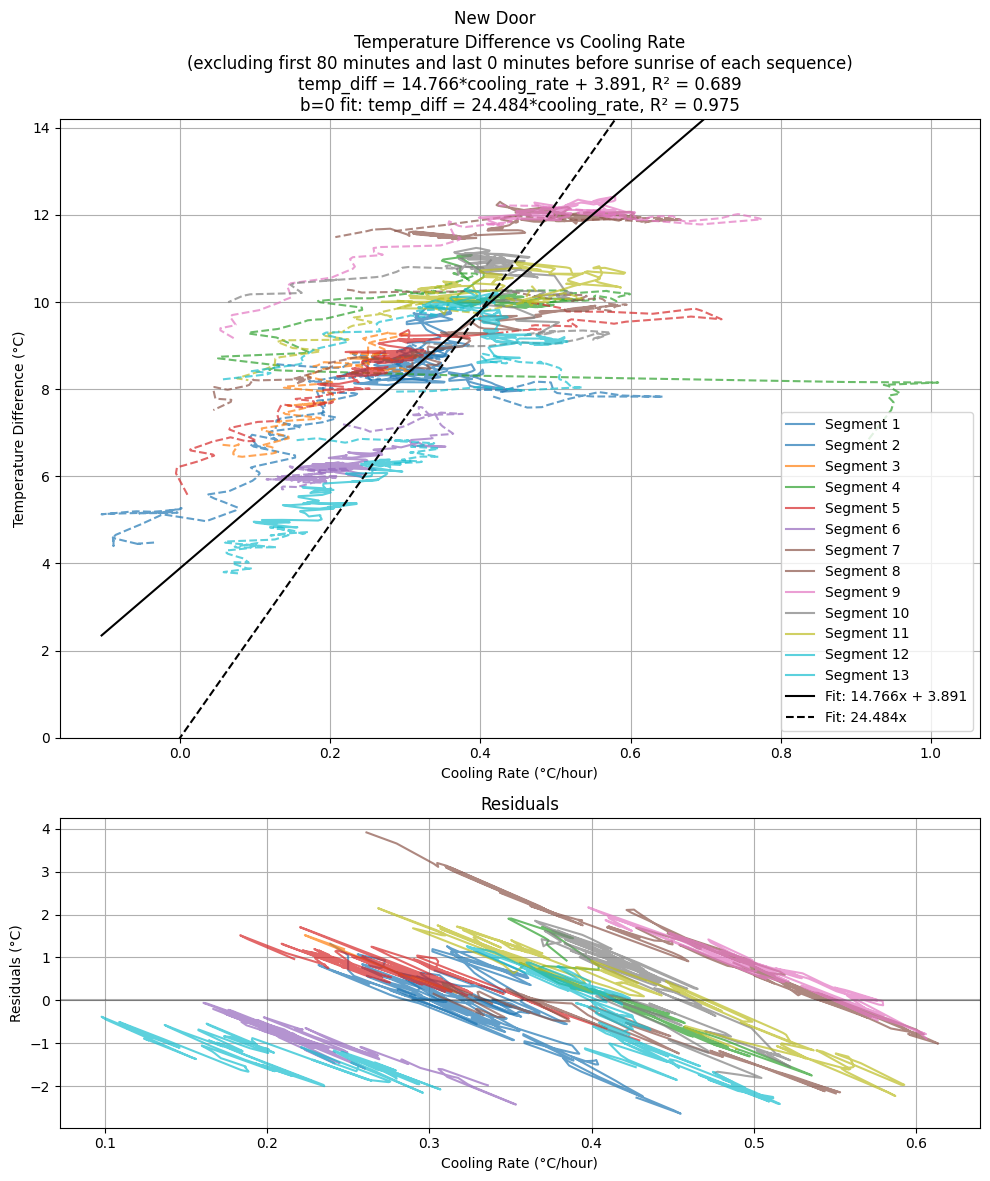

In [15]:
plot_linear_fit(segments, results, "New Door", config=config)

In [16]:
for i, seg in enumerate(segments):
    print(f"Segment {i+1}:")
    get_temp_data(seg)


Segment 1:
mask1 (delay_time <= time <= sunrise): 77, mask2 (time >= delay_time): 94
Segment 2:
mask1 (delay_time <= time <= sunrise): 48, mask2 (time >= delay_time): 100
Segment 3:
mask1 (delay_time <= time <= sunrise): 6, mask2 (time >= delay_time): 43
Segment 4:
mask1 (delay_time <= time <= sunrise): 50, mask2 (time >= delay_time): 78
Segment 5:
mask1 (delay_time <= time <= sunrise): 77, mask2 (time >= delay_time): 104
Segment 6:
mask1 (delay_time <= time <= sunrise): 54, mask2 (time >= delay_time): 86
Segment 7:
mask1 (delay_time <= time <= sunrise): 37, mask2 (time >= delay_time): 58
Segment 8:
mask1 (delay_time <= time <= sunrise): 76, mask2 (time >= delay_time): 78
Segment 9:
mask1 (delay_time <= time <= sunrise): 58, mask2 (time >= delay_time): 79
Segment 10:
mask1 (delay_time <= time <= sunrise): 96, mask2 (time >= delay_time): 108
Segment 11:
mask1 (delay_time <= time <= sunrise): 82, mask2 (time >= delay_time): 104
Segment 12:
mask1 (delay_time <= time <= sunrise): 87, mask2

In [17]:
two_segments = [segments[2], segments[6]]
for seg in two_segments:
    get_temp_data(seg)


mask1 (delay_time <= time <= sunrise): 6, mask2 (time >= delay_time): 43
mask1 (delay_time <= time <= sunrise): 37, mask2 (time >= delay_time): 58


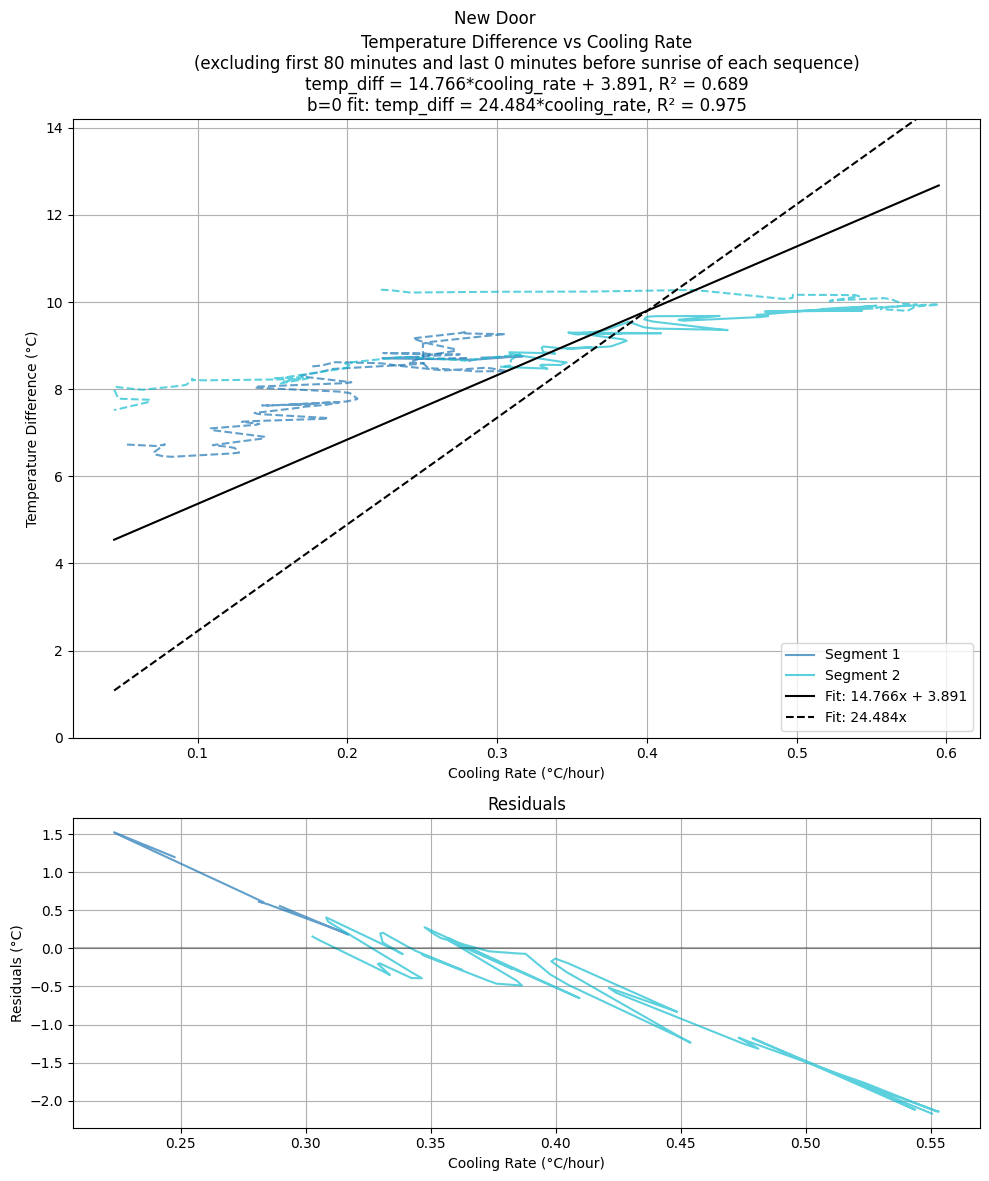

In [18]:
plot_linear_fit(two_segments, results, "New Door", config=config)

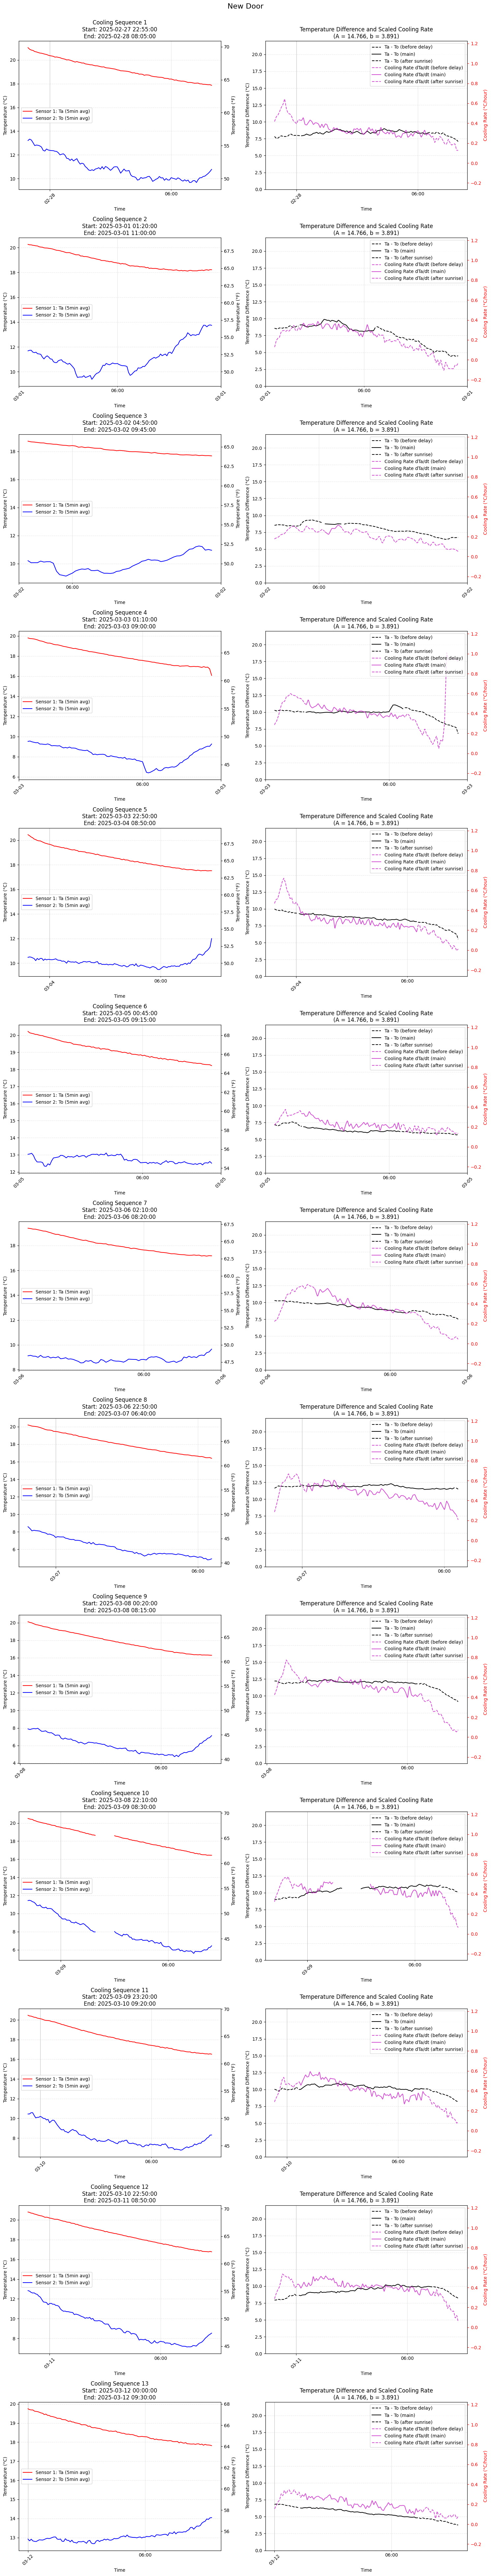

In [19]:
plot_all_segments(segments, results, "New Door", config=config)

---
Plot New and Old door segments along with their fits.

In [20]:
smoothed_window = 60  # 1 hour window for smoothing

In [21]:
new_segments = process_segments(dfn_r1, dfn_r2, config)

new_results = analyze_segments(new_segments, config)

old_segments = process_segments(dfo_r1, dfo_r2, config)

old_results = analyze_segments(old_segments, config)

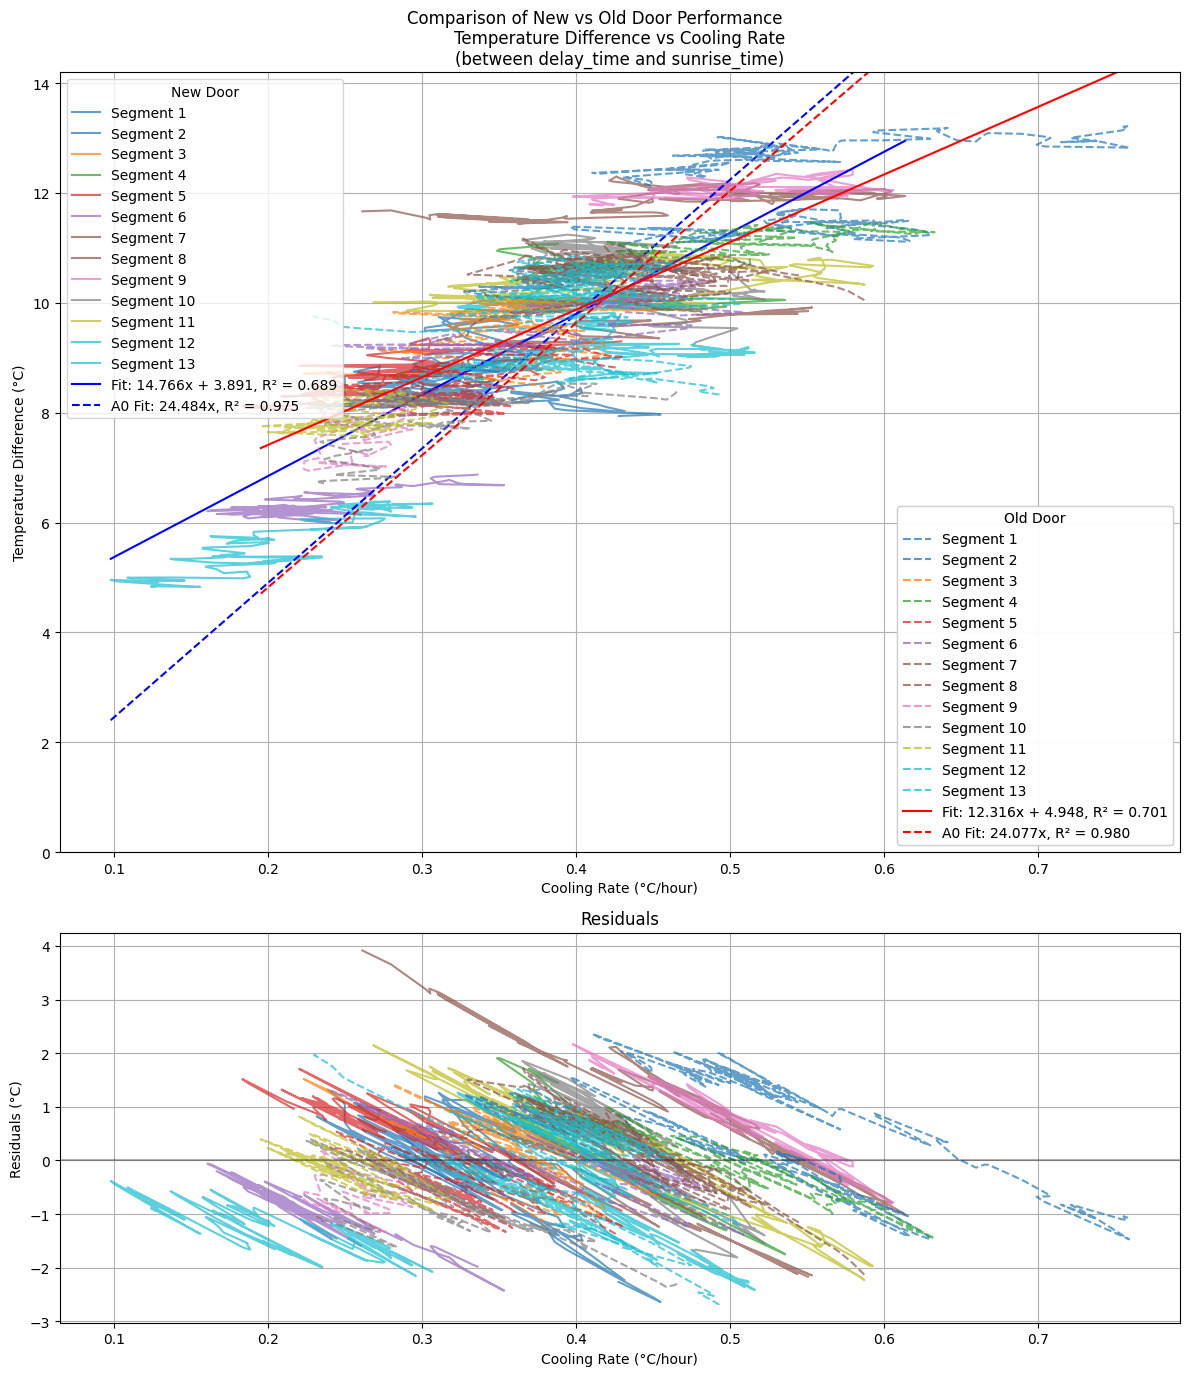

In [22]:
plot_linear_fit_comparison(new_segments, old_segments, new_results, old_results, 
                          "Comparison of New vs Old Door Performance")

---
---
### Run random assortment of runs

In [23]:
def run_random_analyses(
    temperature_data_file: str,
    cutoff_time: str = '2025-02-27 19:48:04',
    N: int = 10,
    seed: int = 42
) -> pd.DataFrame:
    """
    Run analyses with random configurations
    
    Args:
        temperature_data_file: Path to temperature data
        cutoff_time: Timestamp to split old/new door data
        N: Number of random configurations to try
        seed: Random seed for reproducibility
    """
    np.random.seed(seed)
    
    # Generate random configurations
    #delay_times = np.random.uniform(80, 180, N).astype(int)
    delay_times = np.random.uniform(60, 80, N).astype(int)
    sunrise_deltas = np.random.uniform(-30, 30, N).astype(int)
    resample_mins = np.random.uniform(5, 10, N).astype(int)
    
    # Store results
    results_list = []
    
    for i in range(N):
        config = AnalysisConfig(
            delay_time=int(delay_times[i]),
            before_sunrise_delta_minutes=int(sunrise_deltas[i]),
            resample_minutes=int(resample_mins[i])
        )
        
        # Process old door data (before cutoff)
        df_old, df_r1_old, df_r2_old = load_temperature_data(
            temperature_data_file, 
            config,
            cutoff_time=cutoff_time,
            comparison='<='
        )
        segments_old = process_segments(df_r1_old, df_r2_old, config)
        results_old = analyze_segments(segments_old, config)
        
        # Perform time-dependent analysis A*(cooling rate)/(1 + b*t)
        results_old_time_dependent = analyze_segments_time_dependent(segments_old, config)

        # Process new door data (after cutoff)
        df_new, df_r1_new, df_r2_new = load_temperature_data(
            temperature_data_file, 
            config,
            cutoff_time=cutoff_time,
            comparison='>='
        )
        segments_new = process_segments(df_r1_new, df_r2_new, config)
        results_new = analyze_segments(segments_new, config)
        
        # Perform time-dependent analysis A*(cooling rate)/(1 + b*t)
        results_new_time_dependent = analyze_segments_time_dependent(segments_new, config)

        # Create result dictionary
        result_dict = {
            'config_id': i,
            'delay_time': config.delay_time,
            'before_sunrise_delta': config.before_sunrise_delta_minutes,
            'resample_minutes': config.resample_minutes,
        }
        
        # Add old door results with prefix
        old_dict = asdict(results_old)
        result_dict.update({f'old_{k}': v for k, v in old_dict.items()})
            
        # Add old door time-dependent results with prefix:
        old_time_dependent_dict = asdict(results_old_time_dependent)
        result_dict.update({f'old_time_dependent_{k}': v for k, v in old_time_dependent_dict.items()})

        # Add new door results with prefix
        new_dict = asdict(results_new)
        result_dict.update({f'new_{k}': v for k, v in new_dict.items()})

        # Add new door time-dependent results with prefix:
        new_time_dependent_dict = asdict(results_new_time_dependent)
        result_dict.update({f'new_time_dependent_{k}': v for k, v in new_time_dependent_dict.items()})

        results_list.append(result_dict)
    
    # Convert to DataFrame
    return pd.DataFrame(results_list)

# Usage example:
if __name__ == "__main__":
    results_df = run_random_analyses(
        'temperature_logC_2025-03-12.csv',  # single data file
        cutoff_time='2025-02-27 19:48:04'   # time to split old/new data
    )
    
    # Display results
    print(results_df)
    
    # Save to CSV
    results_df.to_csv('random_analysis_results.csv', index=False)

   config_id  delay_time  before_sunrise_delta  resample_minutes      old_A  \
0          0          67                   -28                 8  12.971834   
1          1          79                    28                 5  12.280996   
2          2          74                    19                 6  13.389142   
3          3          71                   -17                 6  13.023775   
4          4          63                   -19                 7  12.161908   
5          5          63                   -18                 8  12.903751   
6          6          61                   -11                 5  11.348157   
7          7          77                     1                 7  12.944028   
8          8          72                    -4                 7  12.723631   
9          9          74                   -12                 5  12.006715   

   old_A_err     old_b  old_b_err     old_A0  old_A0_err  ...  new_r_squared  \
0   0.120587  4.606541   0.048003  24.161415    0.

In [24]:
results_df = run_random_analyses(
    'temperature_logC_2025-03-12.csv',  # single data file
    cutoff_time='2025-02-27 19:48:04',   # time to split old/new data
    N = 200,  # 10, #100,
)

# Display results
#print(results_df)

# Save to CSV
results_df.to_csv('random_analysis_results.csv', index=False)

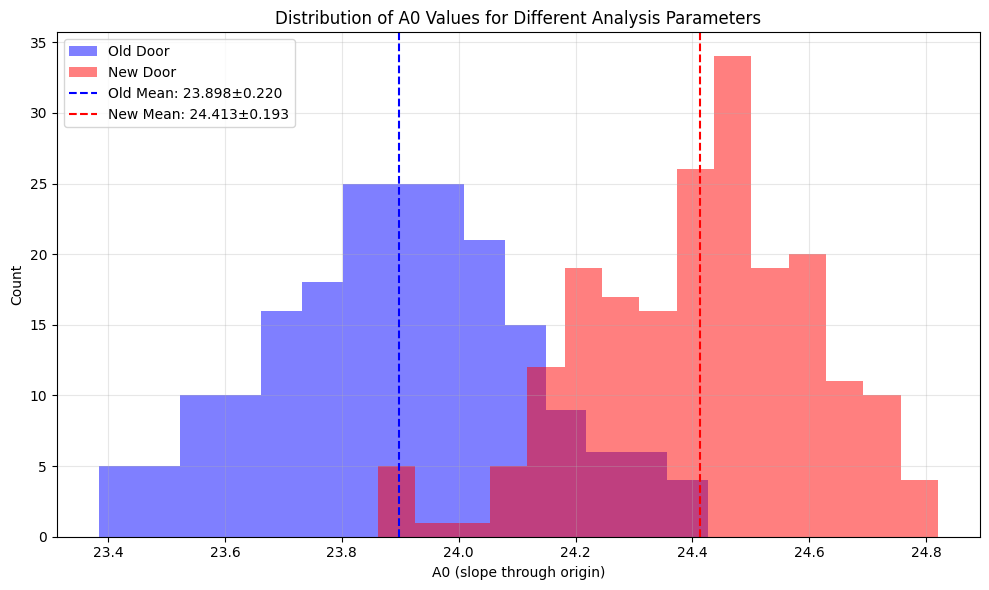

In [25]:
def plot_A0_histogram(results_df: pd.DataFrame):
    plt.figure(figsize=(10, 6))
    
    # Plot histograms
    plt.hist(results_df['old_A0'], bins=15, alpha=0.5, label='Old Door', color='blue')
    plt.hist(results_df['new_A0'], bins=15, alpha=0.5, label='New Door', color='red')
    
    # Add mean lines
    plt.axvline(results_df['old_A0'].mean(), color='blue', linestyle='dashed', 
                label=f'Old Mean: {results_df["old_A0"].mean():.3f}±{results_df["old_A0"].std():.3f}')
    plt.axvline(results_df['new_A0'].mean(), color='red', linestyle='dashed',
                label=f'New Mean: {results_df["new_A0"].mean():.3f}±{results_df["new_A0"].std():.3f}')
    
    plt.xlabel('A0 (slope through origin)')
    plt.ylabel('Count')
    plt.title('Distribution of A0 Values for Different Analysis Parameters')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Use it
plot_A0_histogram(results_df)

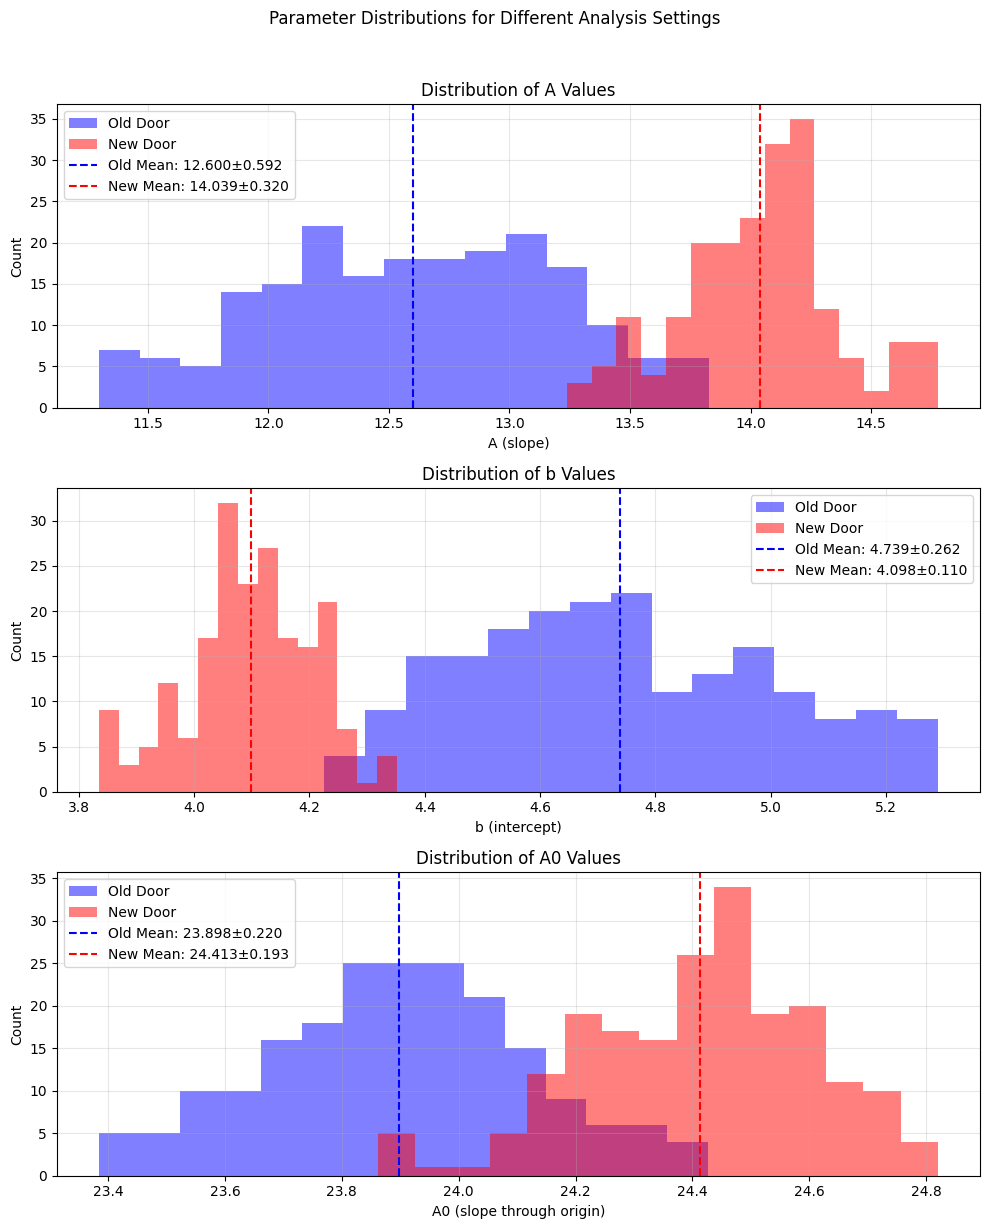

In [26]:
def plot_parameter_comparisons(results_df: pd.DataFrame):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))
    
    # Plot A distributions
    ax1.hist(results_df['old_A'], bins=15, alpha=0.5, label='Old Door', color='blue')
    ax1.hist(results_df['new_A'], bins=15, alpha=0.5, label='New Door', color='red')
    ax1.axvline(results_df['old_A'].mean(), color='blue', linestyle='dashed',
                label=f'Old Mean: {results_df["old_A"].mean():.3f}±{results_df["old_A"].std():.3f}')
    ax1.axvline(results_df['new_A'].mean(), color='red', linestyle='dashed',
                label=f'New Mean: {results_df["new_A"].mean():.3f}±{results_df["new_A"].std():.3f}')
    ax1.set_xlabel('A (slope)')
    ax1.set_ylabel('Count')
    ax1.set_title('Distribution of A Values')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot b distributions
    ax2.hist(results_df['old_b'], bins=15, alpha=0.5, label='Old Door', color='blue')
    ax2.hist(results_df['new_b'], bins=15, alpha=0.5, label='New Door', color='red')
    ax2.axvline(results_df['old_b'].mean(), color='blue', linestyle='dashed',
                label=f'Old Mean: {results_df["old_b"].mean():.3f}±{results_df["old_b"].std():.3f}')
    ax2.axvline(results_df['new_b'].mean(), color='red', linestyle='dashed',
                label=f'New Mean: {results_df["new_b"].mean():.3f}±{results_df["new_b"].std():.3f}')
    ax2.set_xlabel('b (intercept)')
    ax2.set_ylabel('Count')
    ax2.set_title('Distribution of b Values')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Plot A0 distributions
    ax3.hist(results_df['old_A0'], bins=15, alpha=0.5, label='Old Door', color='blue')
    ax3.hist(results_df['new_A0'], bins=15, alpha=0.5, label='New Door', color='red')
    ax3.axvline(results_df['old_A0'].mean(), color='blue', linestyle='dashed',
                label=f'Old Mean: {results_df["old_A0"].mean():.3f}±{results_df["old_A0"].std():.3f}')
    ax3.axvline(results_df['new_A0'].mean(), color='red', linestyle='dashed',
                label=f'New Mean: {results_df["new_A0"].mean():.3f}±{results_df["new_A0"].std():.3f}')
    ax3.set_xlabel('A0 (slope through origin)')
    ax3.set_ylabel('Count')
    ax3.set_title('Distribution of A0 Values')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    plt.suptitle('Parameter Distributions for Different Analysis Settings', y=1.02)
    plt.tight_layout()
    plt.show()

# Use it
plot_parameter_comparisons(results_df)

In [27]:
def plot_parameter_relationships(results_df: pd.DataFrame, door_type: str = "new"):
    """
    Plot relationships between input parameters and fit results for specified door type.
    
    Args:
        results_df: DataFrame with results
        door_type: Either "new" or "old"
    """
    if door_type not in ["new", "old"]:
        raise ValueError("door_type must be either 'new' or 'old'")
        
    # Input parameters with correct column names
    input_params = ['delay_time', 'before_sunrise_delta', 'resample_minutes']
    
    # Create figures for A, A0, and b relationships
    fig1, axes1 = plt.subplots(2, len(input_params), figsize=(15, 8))
    fig1.suptitle(f'Relationships between Input Parameters and {door_type.title()} A (slope)', y=1.02)
    
    fig2, axes2 = plt.subplots(2, len(input_params), figsize=(15, 8))
    fig2.suptitle(f'Relationships between Input Parameters and {door_type.title()} A0 (initial value)', y=1.02)
    
    fig3, axes3 = plt.subplots(2, len(input_params), figsize=(15, 8))
    fig3.suptitle(f'Relationships between Input Parameters and {door_type.title()} b (intercept)', y=1.02)
    
    for idx, param in enumerate(input_params):
        # Scatter plots and 2D histograms for A
        axes1[0, idx].scatter(results_df[param], results_df[f'{door_type}_A'], alpha=0.5)
        axes1[0, idx].set_xlabel(param)
        axes1[0, idx].set_ylabel(f'{door_type}_A')
        axes1[0, idx].grid(True, alpha=0.3)
        
        h = axes1[1, idx].hist2d(results_df[param], results_df[f'{door_type}_A'], 
                                bins=20, cmap='viridis')
        axes1[1, idx].set_xlabel(param)
        axes1[1, idx].set_ylabel(f'{door_type}_A')
        plt.colorbar(h[3], ax=axes1[1, idx])
        
        # Scatter plots and 2D histograms for A0
        axes2[0, idx].scatter(results_df[param], results_df[f'{door_type}_A0'], alpha=0.5)
        axes2[0, idx].set_xlabel(param)
        axes2[0, idx].set_ylabel(f'{door_type}_A0')
        axes2[0, idx].grid(True, alpha=0.3)
        
        h = axes2[1, idx].hist2d(results_df[param], results_df[f'{door_type}_A0'], 
                                bins=20, cmap='viridis')
        axes2[1, idx].set_xlabel(param)
        axes2[1, idx].set_ylabel(f'{door_type}_A0')
        plt.colorbar(h[3], ax=axes2[1, idx])
        
        # Scatter plots and 2D histograms for b
        axes3[0, idx].scatter(results_df[param], results_df[f'{door_type}_b'], alpha=0.5)
        axes3[0, idx].set_xlabel(param)
        axes3[0, idx].set_ylabel(f'{door_type}_b')
        axes3[0, idx].grid(True, alpha=0.3)
        
        h = axes3[1, idx].hist2d(results_df[param], results_df[f'{door_type}_b'], 
                                bins=20, cmap='viridis')
        axes3[1, idx].set_xlabel(param)
        axes3[1, idx].set_ylabel(f'{door_type}_b')
        plt.colorbar(h[3], ax=axes3[1, idx])
    
    plt.tight_layout()
    
    # Additional correlation analysis
    print(f"\nCorrelations with {door_type}_A:")
    for param in input_params:
        corr = results_df[param].corr(results_df[f'{door_type}_A'])
        print(f"{param}: {corr:.3f}")
        
    print(f"\nCorrelations with {door_type}_A0:")
    for param in input_params:
        corr = results_df[param].corr(results_df[f'{door_type}_A0'])
        print(f"{param}: {corr:.3f}")
        
    print(f"\nCorrelations with {door_type}_b:")
    for param in input_params:
        corr = results_df[param].corr(results_df[f'{door_type}_b'])
        print(f"{param}: {corr:.3f}")

/var/folders/jz/23vnqjfn1xg6v4l3v0tttrmc0000gp/T/ipykernel_42471/1738817233.py:36: UserWarning: Adding colorbar to a different Figure <Figure size 1500x800 with 7 Axes> than <Figure size 1500x800 with 6 Axes> which fig.colorbar is called on.
  plt.colorbar(h[3], ax=axes1[1, idx])
/var/folders/jz/23vnqjfn1xg6v4l3v0tttrmc0000gp/T/ipykernel_42471/1738817233.py:48: UserWarning: Adding colorbar to a different Figure <Figure size 1500x800 with 7 Axes> than <Figure size 1500x800 with 6 Axes> which fig.colorbar is called on.
  plt.colorbar(h[3], ax=axes2[1, idx])
/var/folders/jz/23vnqjfn1xg6v4l3v0tttrmc0000gp/T/ipykernel_42471/1738817233.py:36: UserWarning: Adding colorbar to a different Figure <Figure size 1500x800 with 8 Axes> than <Figure size 1500x800 with 7 Axes> which fig.colorbar is called on.
  plt.colorbar(h[3], ax=axes1[1, idx])
/var/folders/jz/23vnqjfn1xg6v4l3v0tttrmc0000gp/T/ipykernel_42471/1738817233.py:48: UserWarning: Adding colorbar to a different Figure <Figure size 1500x800 w


Correlations with old_A:
delay_time: 0.429
before_sunrise_delta: 0.135
resample_minutes: 0.439

Correlations with old_A0:
delay_time: 0.649
before_sunrise_delta: -0.745
resample_minutes: 0.260

Correlations with old_b:
delay_time: -0.278
before_sunrise_delta: -0.225
resample_minutes: -0.459


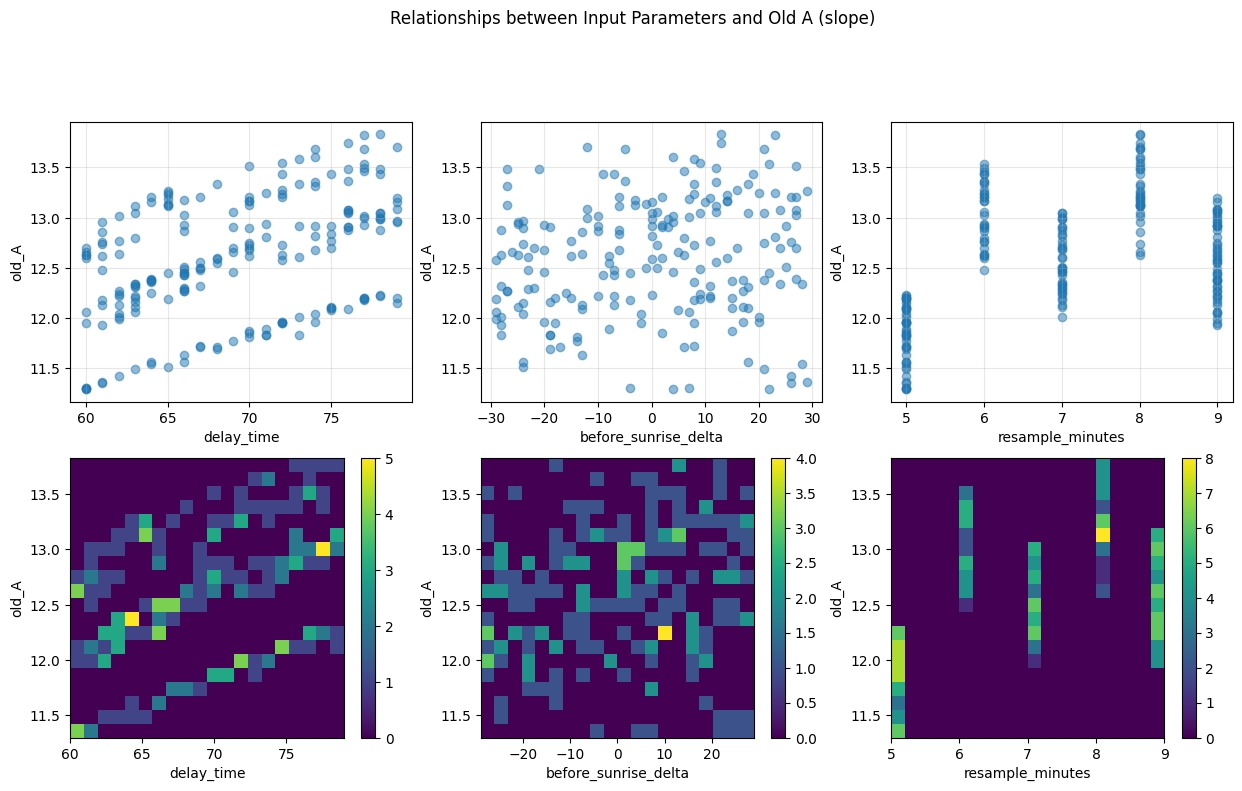

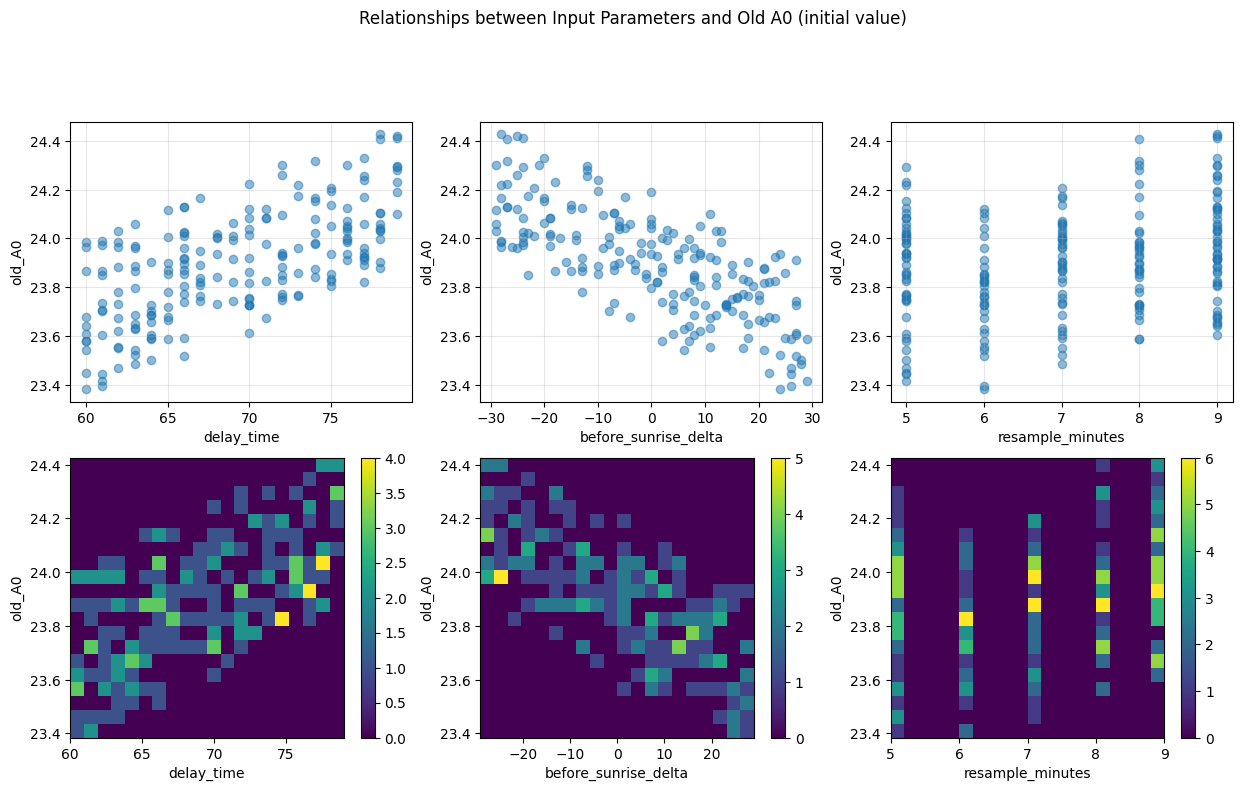

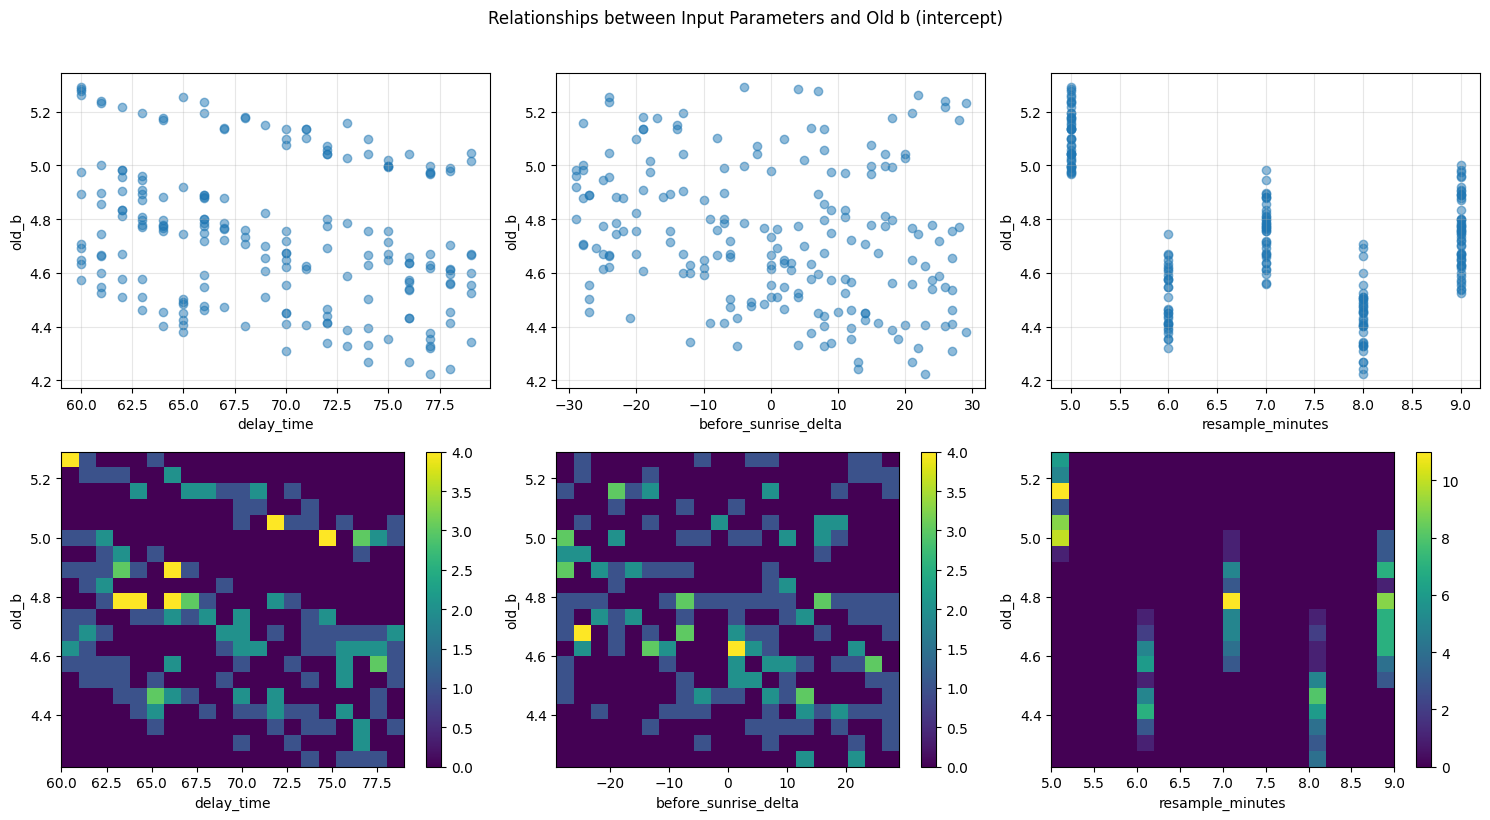

In [28]:
plot_parameter_relationships(results_df, "old")

/var/folders/jz/23vnqjfn1xg6v4l3v0tttrmc0000gp/T/ipykernel_42471/1738817233.py:36: UserWarning: Adding colorbar to a different Figure <Figure size 1500x800 with 7 Axes> than <Figure size 1500x800 with 6 Axes> which fig.colorbar is called on.
  plt.colorbar(h[3], ax=axes1[1, idx])
/var/folders/jz/23vnqjfn1xg6v4l3v0tttrmc0000gp/T/ipykernel_42471/1738817233.py:48: UserWarning: Adding colorbar to a different Figure <Figure size 1500x800 with 7 Axes> than <Figure size 1500x800 with 6 Axes> which fig.colorbar is called on.
  plt.colorbar(h[3], ax=axes2[1, idx])
/var/folders/jz/23vnqjfn1xg6v4l3v0tttrmc0000gp/T/ipykernel_42471/1738817233.py:36: UserWarning: Adding colorbar to a different Figure <Figure size 1500x800 with 8 Axes> than <Figure size 1500x800 with 7 Axes> which fig.colorbar is called on.
  plt.colorbar(h[3], ax=axes1[1, idx])
/var/folders/jz/23vnqjfn1xg6v4l3v0tttrmc0000gp/T/ipykernel_42471/1738817233.py:48: UserWarning: Adding colorbar to a different Figure <Figure size 1500x800 w


Correlations with new_A:
delay_time: 0.470
before_sunrise_delta: 0.568
resample_minutes: -0.545

Correlations with new_A0:
delay_time: 0.399
before_sunrise_delta: -0.804
resample_minutes: 0.234

Correlations with new_b:
delay_time: -0.346
before_sunrise_delta: -0.577
resample_minutes: 0.598


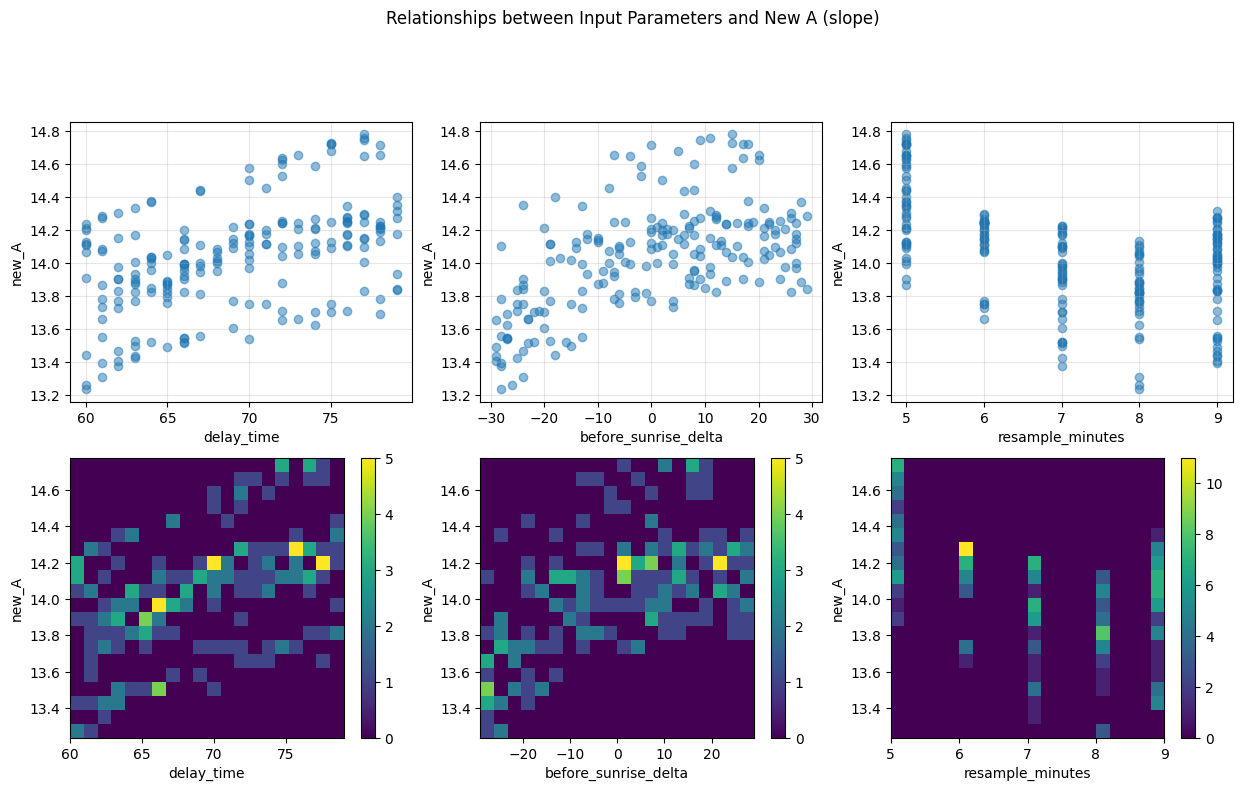

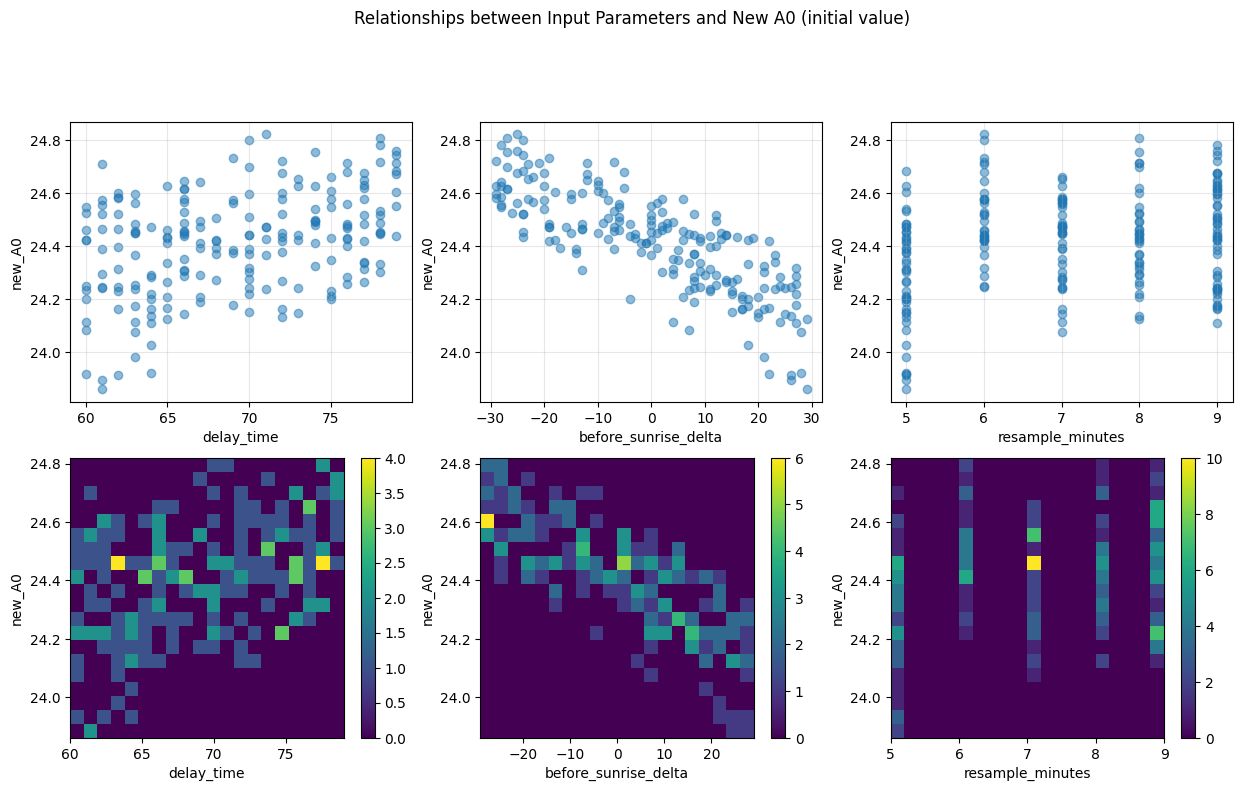

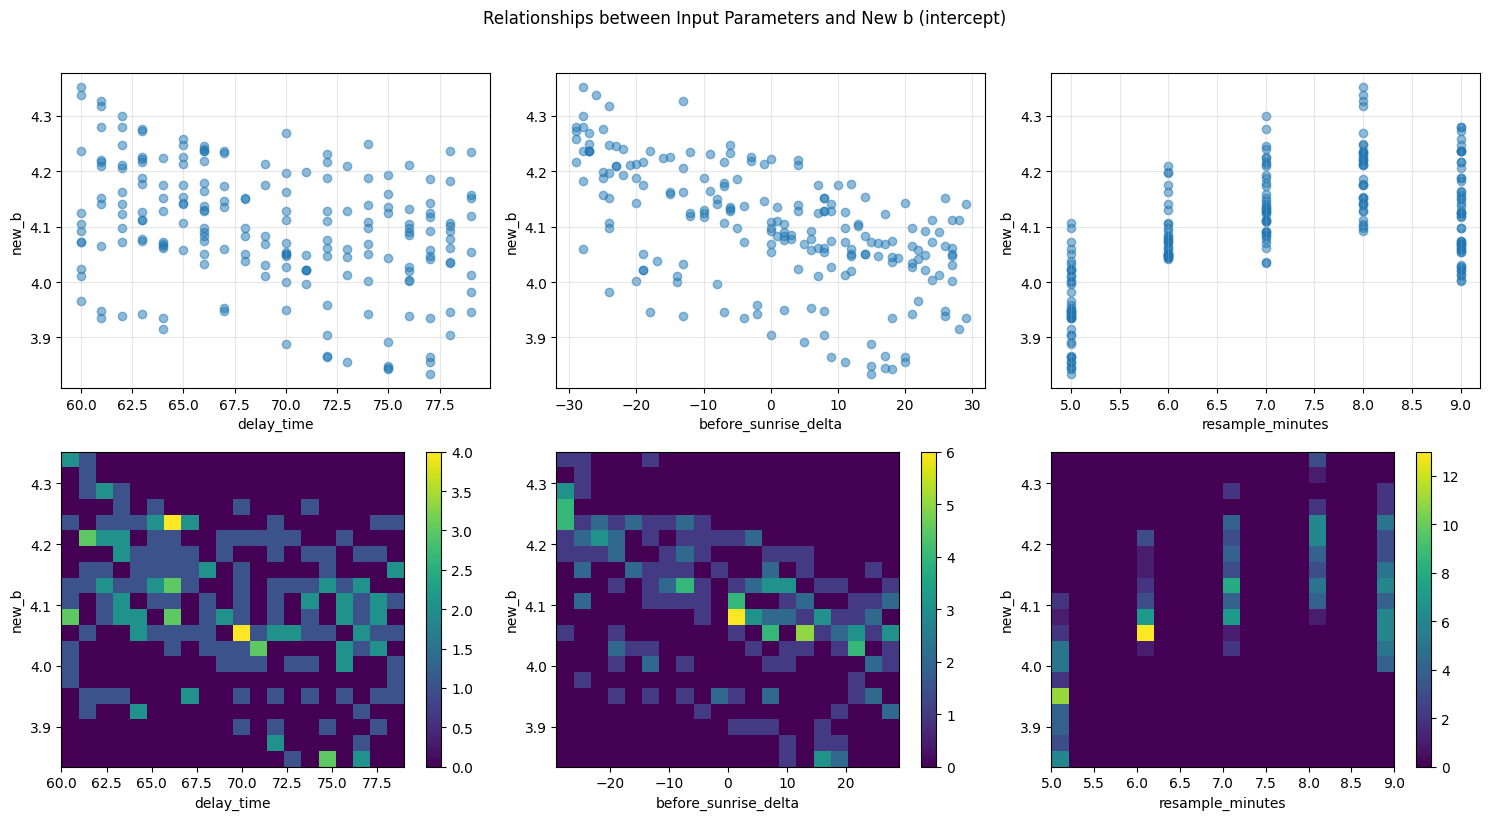

In [29]:
plot_parameter_relationships(results_df, "new")

Shapiro-Wilk test for normality:
Statistic: 0.921
p-value: 0.000


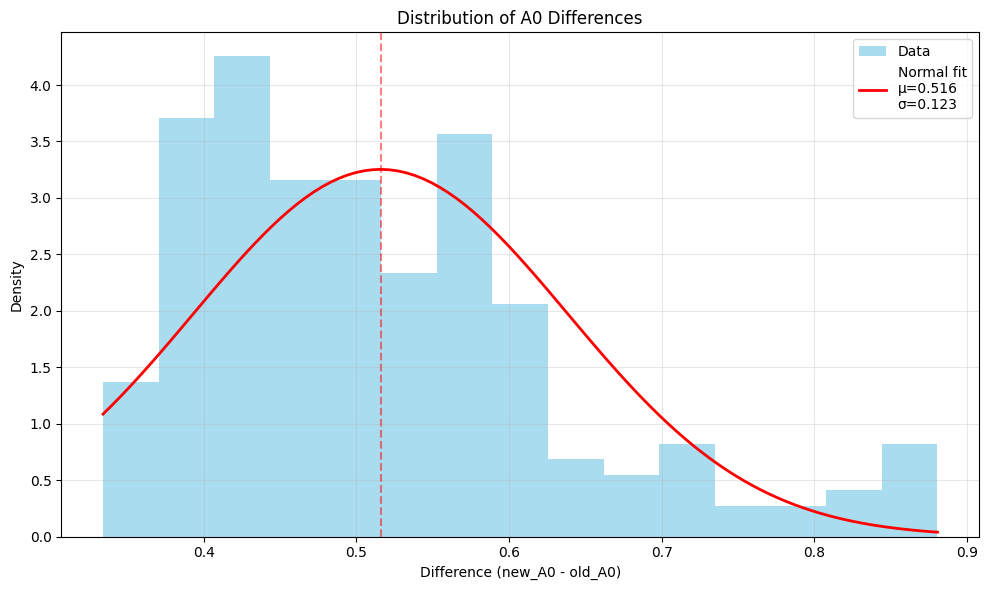

In [30]:
from scipy import stats

def plot_A0_difference_histogram(results_df: pd.DataFrame):
    # Calculate the difference
    A0_diff = results_df['new_A0'] - results_df['old_A0']
    
    # Create the figure
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot histogram
    n, bins, patches = ax.hist(A0_diff, bins=15, density=True, alpha=0.7, 
                              color='skyblue', label='Data')
    
    # Fit normal distribution
    mu = np.mean(A0_diff)
    sigma = np.std(A0_diff)
    
    # Generate points for the normal distribution curve
    x = np.linspace(min(bins), max(bins), 100)
    normal_dist = stats.norm.pdf(x, mu, sigma)
    
    # Plot the fitted normal distribution
    ax.plot(x, normal_dist, 'r-', lw=2, 
            label=f'Normal fit\nμ={mu:.3f}\nσ={sigma:.3f}')
    
    # Add vertical line at mean
    ax.axvline(mu, color='red', linestyle='--', alpha=0.5)
    
    # Add labels and title
    ax.set_xlabel('Difference (new_A0 - old_A0)')
    ax.set_ylabel('Density')
    ax.set_title('Distribution of A0 Differences')
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    # Perform Shapiro-Wilk test for normality
    stat, p_value = stats.shapiro(A0_diff)
    print(f"Shapiro-Wilk test for normality:")
    print(f"Statistic: {stat:.3f}")
    print(f"p-value: {p_value:.3f}")
    
    plt.tight_layout()
    plt.show()
    
    return mu, sigma

# Use it
mu, sigma = plot_A0_difference_histogram(results_df)

In [31]:
(50*28 -300*24)/250.

-23.2

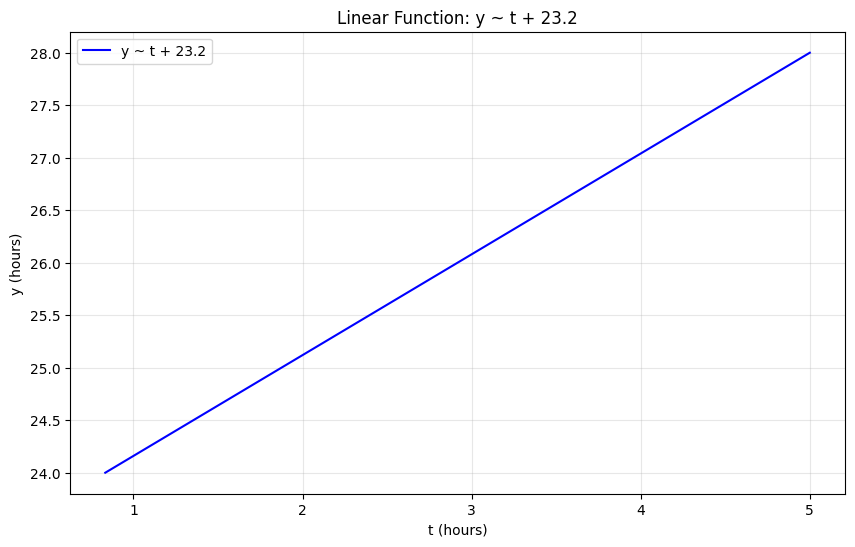

In [32]:
# Create time points
t = np.linspace(50/60., 300/60., 100)

# Calculate values
y = 60.*t/62.5 + 23.2

# Create plot
plt.figure(figsize=(10, 6))
plt.plot(t, y, 'b-', label='y ~ t + 23.2')
plt.xlabel('t (hours)')
plt.ylabel('y (hours)')
plt.title('Linear Function: y ~ t + 23.2')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


Text(0, 0.5, 'Temperature Difference (°C)')

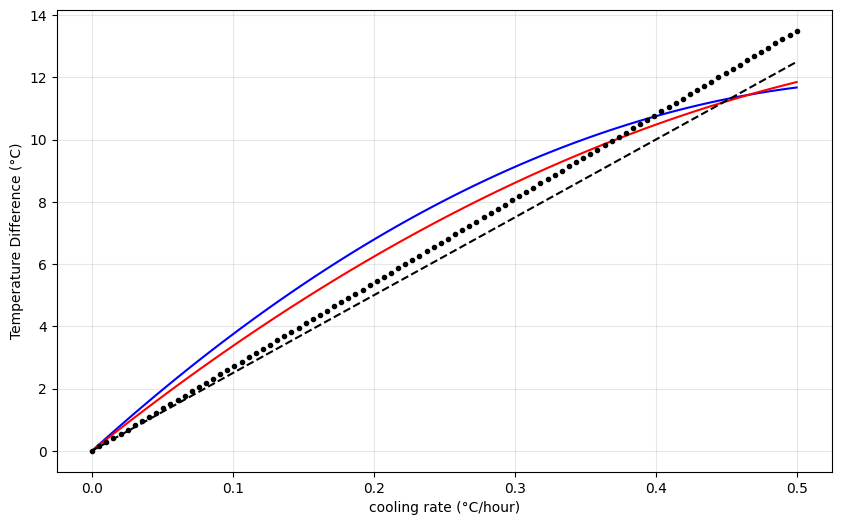

In [33]:
cr = np.linspace(0, 0.5, 100)

new = 41.*cr - 35.3*cr*cr
old = 36.2*cr - 25*cr*cr

plt.figure(figsize=(10, 6))
plt.plot(cr, new, 'b-', label='new')
plt.plot(cr, old, 'r-', label='old')
plt.plot(cr, 25*cr, 'k--', label='25*cr')
plt.plot(cr, 27*cr, 'k.', label='27*cr')
#plt.xlim(0, 0.5)
plt.grid(True, alpha=0.3)
plt.xlabel('cooling rate (°C/hour)')
plt.ylabel('Temperature Difference (°C)')

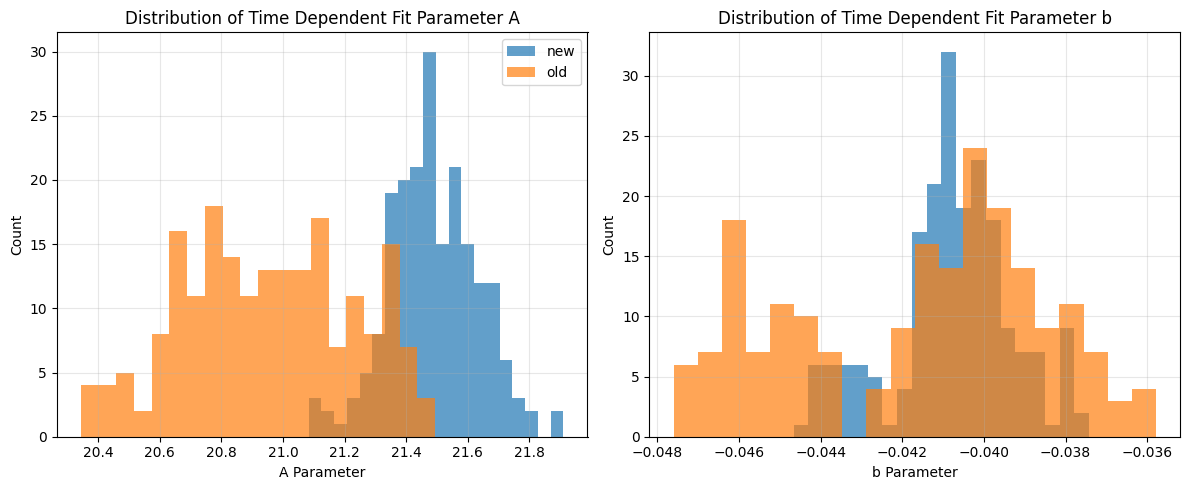

In [34]:
# Plot histograms of time dependent fit parameters A and b
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot histogram of A parameter
ax1.hist(results_df['new_time_dependent_A'], bins=20, alpha=0.7, label='new')   
ax1.hist(results_df['old_time_dependent_A'], bins=20, alpha=0.7, label='old')
ax1.set_xlabel('A Parameter')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Time Dependent Fit Parameter A')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot histogram of b parameter 
ax2.hist(results_df['new_time_dependent_b'], bins=20, alpha=0.7)
ax2.hist(results_df['old_time_dependent_b'], bins=20, alpha=0.7)
ax2.set_xlabel('b Parameter')
ax2.set_ylabel('Count')
ax2.set_title('Distribution of Time Dependent Fit Parameter b')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
